<a href="https://colab.research.google.com/github/anomishra/Techademy_Artificial_intelligence/blob/master/Techademy_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
import nltk

In [2]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [0]:
data_df = pd.read_csv('techademy.csv')
headers = ["Reviews" ]
data_df.columns = headers

In [15]:
data_df

,Reviews
0,During the padyatra in Kalkaji on the last day...
1,# NewProfilePicpic.twitter.com/uXXFE1hPsv
2,"Today at the road show of Kalkaji, popular MP ..."
3,"Today, during the road show in Kalkaji Vidhan ..."
4,BJP plans to fight elections without a CM face...
5,48 hours left before elections and the BJP dir...
6,Today I went to the Kalkaji temple and took th...
7,AAP in the last 5 years has relentlessly fough...
8,Went door to door in Kalkaji this morning with...
9,I have achieved my fundraising target in just ...


In [31]:
data_df.Reviews[11]

# Sentimental analysis calculates one of the three moods for a sentence:
#1. postive
#2. negative
#3. neutral

'Happy Basant Panchami to all the people of Delhi. Pic.twitter.com/nTlXBGxWJZ'

In [19]:
data_df.count

<bound method DataFrame.count of                                               Reviews
0   During the padyatra in Kalkaji on the last day...
1           # NewProfilePicpic.twitter.com/uXXFE1hPsv
2   Today at the road show of Kalkaji, popular MP ...
3   Today, during the road show in Kalkaji Vidhan ...
4   BJP plans to fight elections without a CM face...
5   48 hours left before elections and the BJP dir...
6   Today I went to the Kalkaji temple and took th...
7   AAP in the last 5 years has relentlessly fough...
8   Went door to door in Kalkaji this morning with...
9   I have achieved my fundraising target in just ...
10  On this Martyr’s Day, I’d like to pay my tribu...
11  Happy Basant Panchami to all the people of Del...
12  BJP's MPs showed a Delhi Govt school structure...
13  Arvind Kejriwal worked in the fields of educat...
14  @ AamAadmiParty govt have made primary healthc...
15  Women Empowerment is one of the key priorities...
16  @ ArvindKejriwal’s Delhi Govt. transformed th

In [0]:
all_reviews = data_df['Reviews']
all_sent_values = []
all_sentiments = []

In [3]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
def sentiment_value(paragraph):
    analyser = SentimentIntensityAnalyzer()
    result = analyser.polarity_scores(paragraph)
    score = result['compound']
    return round(score,1)

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [17]:
sample = data_df['Reviews'][11]

print(sample)
print('Sentiment: ')
print(sentiment_value(sample))

Happy Basant Panchami to all the people of Delhi. Pic.twitter.com/nTlXBGxWJZ
Sentiment: 
0.6


In [0]:
for i in range(0,23):
    all_sent_values.append(sentiment_value(all_reviews[i]))

In [0]:
SENTIMENT_VALUE = []
SENTIMENT = []
for i in range(0,23):
    sent = all_sent_values[i]
    if (sent<=1 and sent>=0.5):
        SENTIMENT.append('V.Positive')
        SENTIMENT_VALUE.append(5)
    elif (sent<0.5 and sent>0):
        SENTIMENT.append('Positive')
        SENTIMENT_VALUE.append(4)
    elif (sent==0):
        SENTIMENT.append('Neutral')
        SENTIMENT_VALUE.append(3)
    elif (sent<0 and sent>=-0.5):
        SENTIMENT.append('Negative')
        SENTIMENT_VALUE.append(2)
    else:
        SENTIMENT.append('V.Negative')
        SENTIMENT_VALUE.append(1)

In [0]:
#Sentiment Analysis on first 1000 rows
temp_data = data_df[0:23]

In [25]:
temp_data['SENTIMENT_VALUE'] = SENTIMENT_VALUE
temp_data['SENTIMENT'] = SENTIMENT

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [26]:
temp_data.head()

,Reviews,SENTIMENT_VALUE,SENTIMENT
0,During the padyatra in Kalkaji on the last day...,5,V.Positive
1,# NewProfilePicpic.twitter.com/uXXFE1hPsv,3,Neutral
2,"Today at the road show of Kalkaji, popular MP ...",5,V.Positive
3,"Today, during the road show in Kalkaji Vidhan ...",5,V.Positive
4,BJP plans to fight elections without a CM face...,2,Negative


Text(0.5, 1.0, 'SENTIMENT bins')

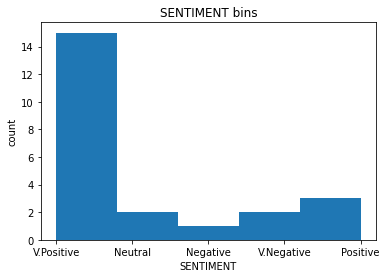

In [28]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot

a = (0,1,2)

# draw historgram of attribute "horsepower" with bins = 3
plt.pyplot.hist(temp_data["SENTIMENT"], bins = 5)

# set x/y labels and plot title
plt.pyplot.xlabel("SENTIMENT")
plt.pyplot.ylabel("count")
plt.pyplot.title("SENTIMENT bins")